### seaborn 라이브러리로 산점도 그래프 그리기

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
tips = sns.load_dataset('tips')

In [13]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### 산점도 그래프를 그리기 위해 regplot를 사용

Text(0.5, 1.0, 'Bill and Tip')

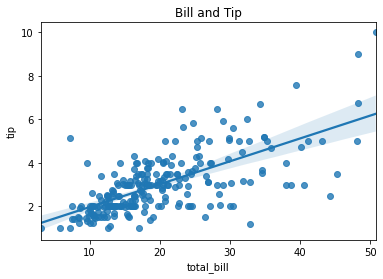

In [10]:
# 만약 회귀선을 제거하려면 fit_reg 인자를 False로 지정 

ax = plt.subplots()
ax = sns.regplot(x='total_bill', y='tip', data=tips, fit_reg=True)
ax.set_title('Bill and Tip')

### 산점도 그래프와 히스토그램을 한번에 그리기
- jointplot 사용

Text(0.5, 1.03, 'joint Total and Tip')

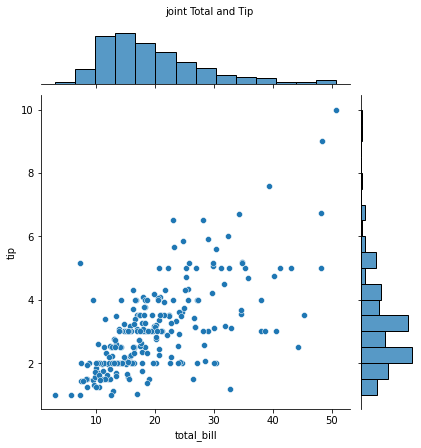

In [12]:
joint = sns.jointplot(x='total_bill', y='tip', data=tips)
joint.fig.suptitle('joint Total and Tip', fontsize=10, y=1.03)

In [ ]:
### 산점도 그래프는 점이 겹쳐 보일 경우 점을 구분하기 어려운 점이 있음 -> 육각 그래프 활용
- jointplot 메서드 (kind = hex)

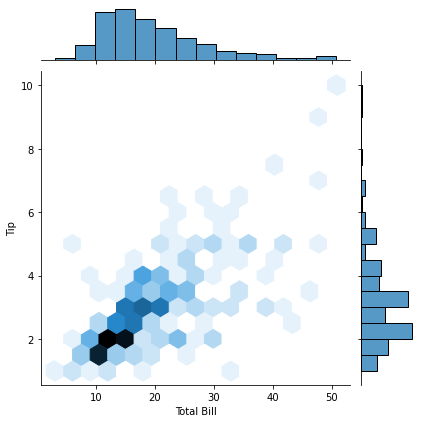

In [19]:
hexbin = sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')
hexbin.set_axis_labels(xlabel='Total Bill', ylabel='Tip')

### 이차원 밀집도 그리기
- kdeplot 메서드 사용

Text(0.5, 1.0, 'Bill and Tip')

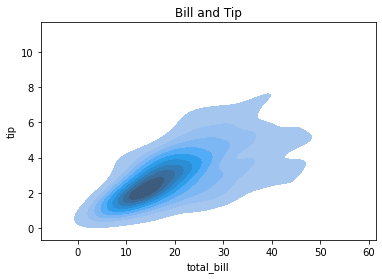

In [17]:
# 그래프에 음영 효과 shade = True
ax = plt.subplots()
ax = sns.kdeplot(data = tips['total_bill'],
                 data2=tips['tip'],
                 shade=True)
ax.set_title('Bill and Tip')

### 바 그래프 그리기
- 시간에 따라 지불한 비용의 평균을 바 그래프로 표현

Text(0.5, 1.0, 'Bill and Tip')

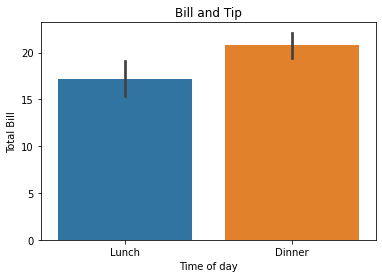

In [22]:
ax = plt.subplots()
ax = sns.barplot(x='time', y='total_bill', data=tips)
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')
ax.set_title('Bill and Tip')

### 박스 그래프 그리기
- 최솟값, 1분위수, 중간값, 3분위수, 최댓값, 이상치 등 다양한 통계량을 한 번에 표현하는 그래프
- 다양한 통계 수치를 확인하기 위해 사용하지만 데이터 분산이 모호

Text(0.5, 1.0, 'Bill and Tip')

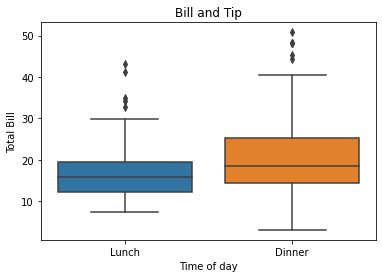

In [23]:
ax = plt.subplots()
ax = sns.boxplot(x='time', y='total_bill', data=tips)
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')
ax.set_title('Bill and Tip')

### 데이터 분산이 모호한 경우 커널 밀도를 추정한 바이올린 그래프 사용
- violinplot 사용

Text(0.5, 1.0, 'Bill and Tip')

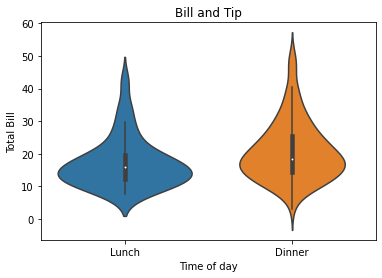

In [25]:
ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill', data=tips)
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')
ax.set_title('Bill and Tip')

### 관계 그래프 그리기
- 관계 그래프는 지금까지 설명한 그래프를 종합한 그래프
- 중복된 정보가 표현되는 단점
- map_upper, map_lower 메서드를 사용하여 그래프 위치 지정

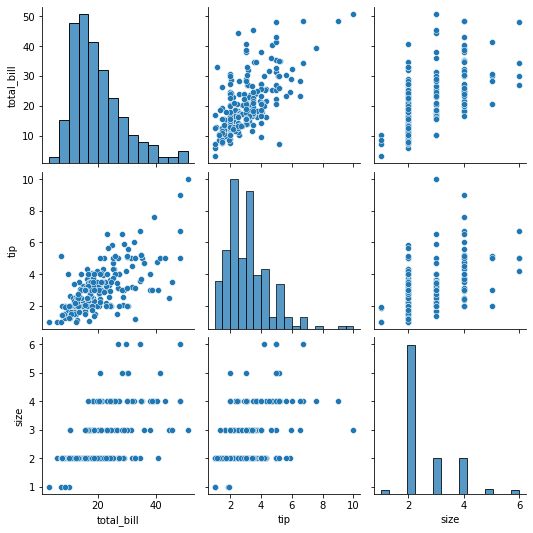

In [26]:
fig = sns.pairplot(tips)

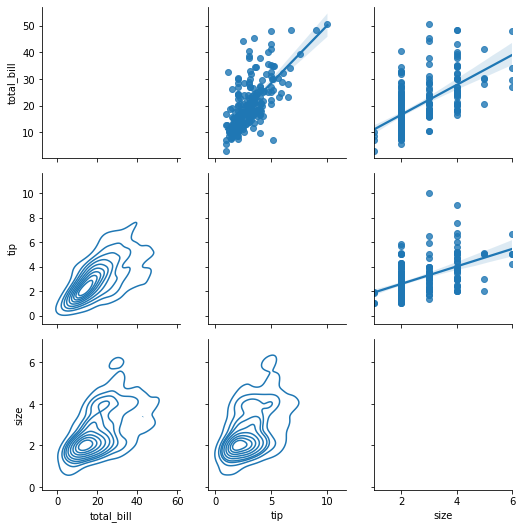

In [40]:
pair_grid = sns.PairGrid(tips)
pair_grid = pair_grid.map_upper(sns.regplot) # 산점도 그래프, 대각선을 기준으로 위쪽에 그릴 그래프 지정
pair_grid = pair_grid.map_lower(sns.kdeplot) # 이차원 밀집도, 대각선을 기준으로 아래쪽에 그릴 그래프 지정
pair_grid = pair_grid.map_diag(sns.distplot, rug=True) # 대각선을 중심으로 그래프 지정
plt.show()

### 다변량 그래프 그리기

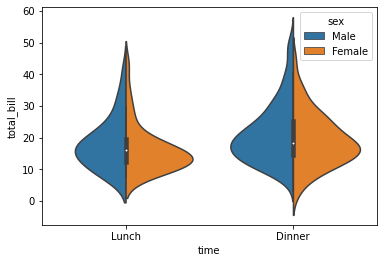

In [48]:
# 1. seaborn 라이브러리로 바이올린 그래프 그리기 -> 색상 추가
# hue 인잣값으로 색상에 사용할 열 이름을 추가
ax = plt.subplot()
ax = sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True)

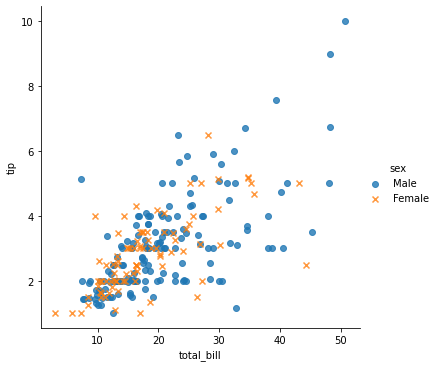

In [61]:
# 2. 산점도, 관계 그래프 그리기 => 색상추가, 크기와 모양 조절
# 색상 : hue, 크기와 모양 조절 : scatter_kws, markers
scatter = sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', fit_reg=False, markers=['o','x'])

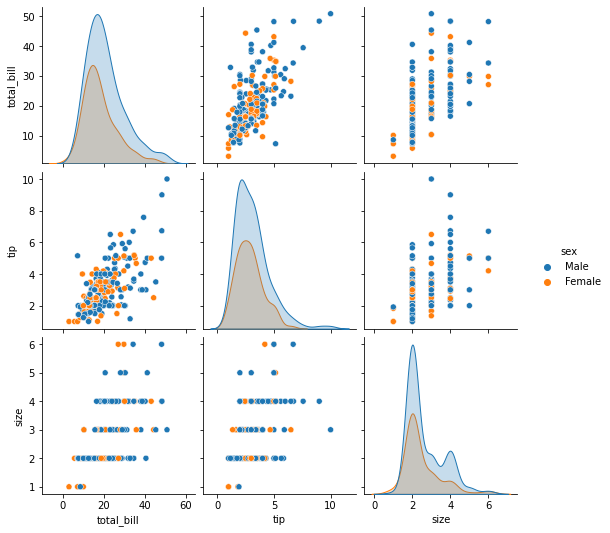

In [51]:
# hue로 색상을 구분하는 열 이름 추가
fig = sns.pairplot(tips,hue='sex')

### FactGrid 클래스로도 그룹별 그래프를 그릴수 있다.

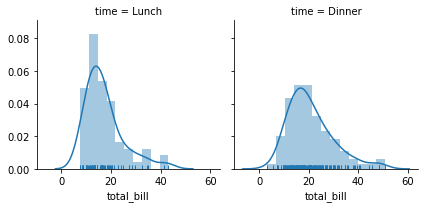

In [63]:
# 1. FactGrid에 데이터프레임과 그룹을 구분할 열 이름을 전달하여 객체를 생성
facet = sns.FacetGrid(tips, col='time')
facet.map(sns.distplot, 'total_bill', rug = True) # rug 선 작성

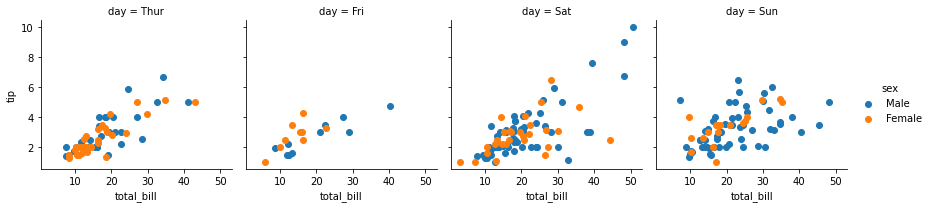

In [64]:
# 2. 다변량 그래프, tips 데이터 집합의 day열로 그룹을 구분하여 그래프 그림
facet = sns.FacetGrid(tips, col='day', hue='sex')
facet = facet.map(plt.scatter, 'total_bill', 'tip')
facet = facet.add_legend()

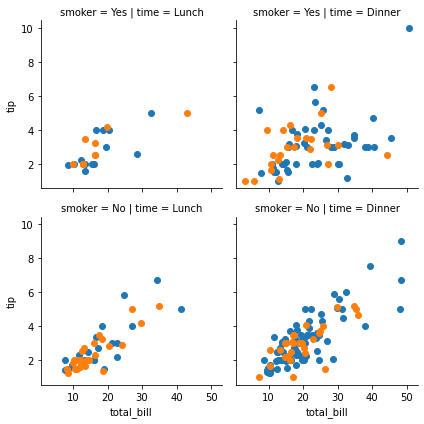

In [67]:
# 3. 더 많은 변수를 사용하여 그래프 그림
facet = sns.FacetGrid(tips, col='time', row='smoker', hue='sex') # 그래프 상단에 위치
facet.map(plt.scatter, 'total_bill', 'tip')